# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    """
    Applies SVD to reduce dimensions of X_train and X_test based on the top 'n_components'.
    
    :param X_train: Training data (n_samples_train, n_features)
    :param X_test: Test data (n_samples_test, n_features)
    :param n_components: Number of singular values/components to retain
    :return: Reduced training and test data sets
    """
    # Step 1: Compute covariance matrix (A^T * A)
    covariance_matrix = np.dot(X_train.T, X_train)
    
    # Step 2: Perform eigenvalue decomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 3: Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 4: Select the top n_components eigenvectors (principal components)
    V_k = sorted_eigenvectors[:, :n_components]
    
    # Step 5: Project the training data onto the reduced space
    X_train_reduced = np.dot(X_train, V_k)
    
    # Step 6: Project the test data onto the same reduced space using V_k
    X_test_reduced = np.dot(X_test, V_k)
    
    return X_train_reduced, X_test_reduced


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
# Part 4: Measuring and Comparing Model Performance

# Step 1: Define different numbers of SVD components to try
svd_components = [10, 50, 100, 200, 500, 784]  # Modify as necessary

# Store the results
results = []



print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # If this is the last run (784 components), store the V_k matrix for visualization
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results for later analysis
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    
    # Print the results for the current SVD component level
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Step 3: Plot the results and top 5 singular vectors



Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


c:\Users\tiazh\OneDrive\CS\CS506\tiaz04-assignment-3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.0233 seconds
Applying custom SVD with 50 components...


c:\Users\tiazh\OneDrive\CS\CS506\tiaz04-assignment-3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 12.5814 seconds
Applying custom SVD with 100 components...


c:\Users\tiazh\OneDrive\CS\CS506\tiaz04-assignment-3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 47.4527 seconds
Applying custom SVD with 200 components...


c:\Users\tiazh\OneDrive\CS\CS506\tiaz04-assignment-3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 124.5008 seconds
Applying custom SVD with 500 components...


c:\Users\tiazh\OneDrive\CS\CS506\tiaz04-assignment-3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


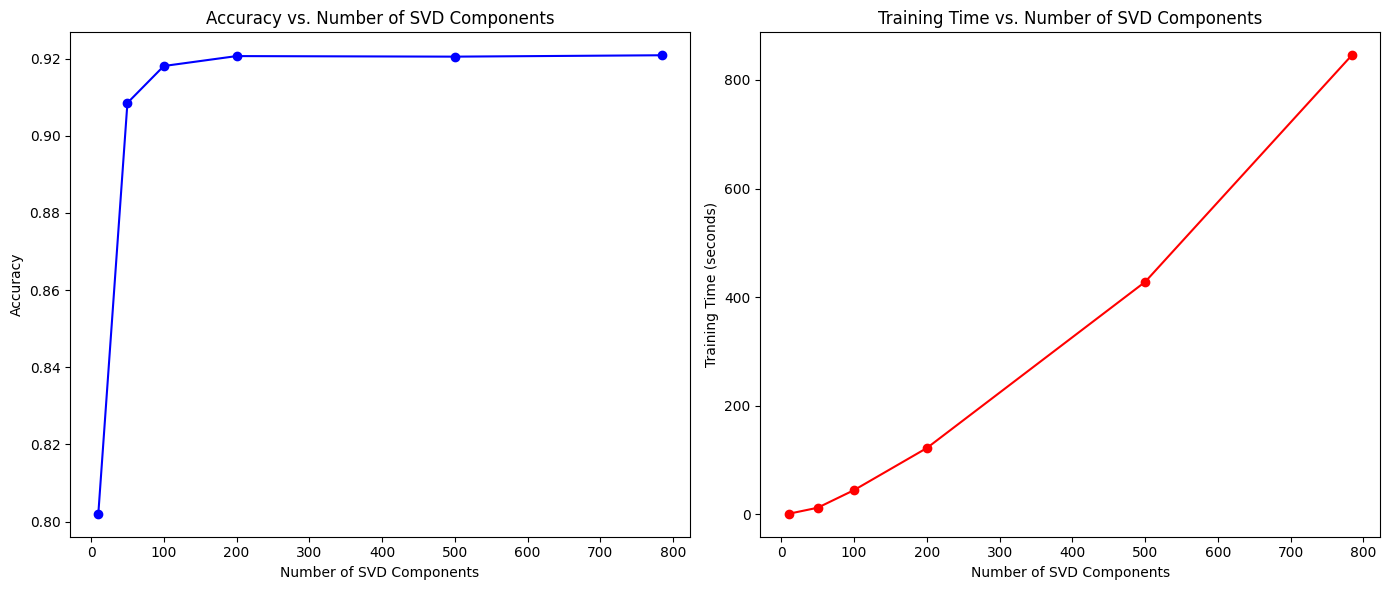

TypeError: 'NoneType' object is not subscriptable

In [5]:
def plot_results_and_singular_vectors(results, V_k):
    """
    Plots the accuracy and training time as a function of the number of SVD components,
    and visualizes the top 5 singular vectors.
    
    :param results: List of dictionaries containing 'n_components', 'accuracy', and 'training_time'
    :param V_k: The right singular vectors matrix from SVD (n_features, n_components)
    """
    # Extract data from results
    components = [r['n_components'] for r in results]
    accuracies = [r['accuracy'] for r in results]
    training_times = [r['training_time'] for r in results]
    
    # Plot accuracy and training time
    plt.figure(figsize=(14, 6))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(components, accuracies, marker='o', color='b')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Number of SVD Components')
    
    # Training time plot
    plt.subplot(1, 2, 2)
    plt.plot(components, training_times, marker='o', color='r')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time vs. Number of SVD Components')
    
    plt.tight_layout()
    plt.show()
    
    # Visualize the top 5 singular vectors (reshaped to 28x28)
    top_singular_vectors = V_k[:, :5]  # Top 5 singular vectors
    plt.figure(figsize=(10, 2))
    for i in range(5):
        singular_vector_image = top_singular_vectors[:, i].reshape(28, 28)  # Reshape to 28x28
        plt.subplot(1, 5, i + 1)
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    
    plt.suptitle('Top 5 Singular Vectors')
    plt.show()



## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

As the number of svd components increase the accuracy of our model also increases. This is true for until we reach a threshold of around 92% accuracy which indicates there is some kind of bottleneck. In addition, as the number of svd componenents increase, the time taken to train our data for the model also increases. It is a little hard to asses on the graph but the time taken seems to have an exponential increase based on the increase in svd components used. 